In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
from scipy import stats

crisis = pd.read_csv(r"C:\Users\ibrom\Documents\SAMPLE DATASET\african crises.csv")
#crisis.info()

In [17]:
#getting the summary of categorical variables
rp.summary_cat(crisis[['country','banking_crisis' ]])

,Variable,Outcome,Count,Percent
0,country,Egypt,155,14.64
1,,South Africa,114,10.76
2,,Zimbabwe,90,8.50
3,,Algeria,85,8.03
4,,Angola,77,7.27
5,,Tunisia,75,7.08
6,,Morocco,75,7.08
7,,Zambia,72,6.80
8,,Mauritius,68,6.42
9,,Kenya,67,6.33


In [5]:
#getting the summary of continous variables
rp.summary_cont(crisis[['systemic_crisis','exch_usd', 'domestic_debt_in_default', 'inflation_annual_cpi']])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,systemic_crisis,1059.0,0.077432,0.267401,0.008217,0.061308,0.093555
1,exch_usd,1059.0,43.140831,111.475380,3.425555,36.419176,49.862485
2,domestic_debt_in_default,1059.0,0.039660,0.195251,0.006000,0.027887,0.051433
3,inflation_annual_cpi,1059.0,20848.892444,675727.429176,20764.599936,-19895.586838,61593.371726


In [6]:
#I want to see the min and Max Value
(crisis[['systemic_crisis','exch_usd', 'domestic_debt_in_default', 'inflation_annual_cpi']]).describe()

,systemic_crisis,exch_usd,domestic_debt_in_default,inflation_annual_cpi
count,1059.000000,1059.000000,1059.000000,1.059000e+03
mean,0.077432,43.140831,0.039660,2.084889e+04
std,0.267401,111.475380,0.195251,6.757274e+05
min,0.000000,0.000000,0.000000,-2.850214e+01
25%,0.000000,0.195350,0.000000,2.086162e+00
50%,0.000000,0.868400,0.000000,5.762330e+00
75%,0.000000,8.462750,0.000000,1.164405e+01
max,1.000000,744.306139,1.000000,2.198970e+07


In [7]:
crisis.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [8]:
crisis.groupby('country')['exch_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Algeria,85.0,20.177565,29.413576,5.076100e-02,1.191000e+00,4.378000e+00,2.412300e+01,87.970698
Angola,77.0,15.099671,32.397133,1.250000e-08,2.500000e-08,2.880000e-08,5.692000e-03,101.490000
Central African Republic,58.0,367.686066,147.720341,2.009999e+02,2.453311e+02,2.883998e+02,4.906841e+02,744.306139
Egypt,155.0,1.006045,1.725812,1.906000e-01,1.999000e-01,2.416000e-01,4.348000e-01,7.150000
Ivory Coast,63.0,153.320635,185.911988,0.000000e+00,0.000000e+00,0.000000e+00,2.775000e+02,616.000000
Kenya,67.0,30.713180,30.573997,4.958200e+00,7.142900e+00,1.028620e+01,6.267640e+01,89.350000
Mauritius,68.0,13.759661,10.171874,3.308500e+00,4.784580e+00,9.082100e+00,2.289463e+01,34.336800
Morocco,75.0,5.865309,2.921509,5.000000e-01,3.788350e+00,5.040900e+00,8.445050e+00,11.560000
Nigeria,60.0,38.951022,59.077484,0.000000e+00,0.000000e+00,7.784179e-01,1.008500e+02,158.267000


In [9]:
rp.summary_cat(crisis['banking_crisis'])

,Variable,Outcome,Count,Percent
0,banking_crisis,no_crisis,965,91.12
1,,crisis,94,8.88


In [10]:

#pulling out only Nigeria
c = crisis.groupby('country')
d = c.get_group('Nigeria').reset_index()


Text(0, 0.5, 'Exchange Rate in USD')

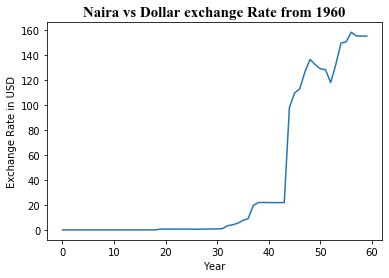

In [11]:
#Plotting Naira exchange rate against dollar
plt.plot(d['exch_usd'])
plt.title('Naira vs Dollar exchange Rate from 1960', fontname = 'Times New Roman', fontsize = 15)
#plt.xticks(np.arange(60), f, rotation = 'vertical')
plt.xlabel('Year')
plt.ylabel('Exchange Rate in USD')


In [24]:
#CPI measures the purchasing power of a country over a period of time.
#I want to assess how banking crisis affects the purchasing power of Nigeria
#Null Hypothesis: no significance difference in CPI when there is crisis and when there is no crisis
#Alternative Hypothesis : there is significance difference in CPI when there is crisis and when there is no crisis
# Student t test/ independent t test is the most suitable test for this

#pulling out Nigeria
Nigeria_cpi = crisis.loc[crisis['country'] == 'Nigeria' ]


In [26]:
#getting the description of the intending variables
rp.summary_cont(Nigeria_cpi.groupby('banking_crisis')['inflation_annual_cpi'])

,N,Mean,SD,SE,95% Conf.,Interval
banking_crisis,,,,,,
crisis,11,28.036182,24.606006,7.418990,12.785221,43.287142
no_crisis,49,11.788035,11.209163,1.601309,8.616945,14.959126


In [33]:
#creating two dataframes that are subsets of Niger_cpi datafame which divides the banking crisis into two i.e when there's
#crisis and when theres no crisis
crisis = Nigeria_cpi[(Nigeria_cpi['banking_crisis'] == 'crisis')]
crisis.reset_index(inplace = True)

no_crisis = Nigeria_cpi[(Nigeria_cpi['banking_crisis'] == 'no_crisis')]
no_crisis.reset_index(inplace = True)


In [34]:
#Assumptions check: Homogeneity of variance using Levenes's test
stats.levene(crisis['inflation_annual_cpi'], no_crisis['inflation_annual_cpi'])

LeveneResult(statistic=5.792250991294387, pvalue=0.019302113903278365)

In [38]:
#the Assumption of homogeneity is violated since p is less than 0.05
#we switch to a more generalized test e.g Welch's test

#Assumptions check: Normality check using Shapiro's test
stats.shapiro(crisis['inflation_annual_cpi']), stats.shapiro(no_crisis['inflation_annual_cpi'])


((0.7610207796096802, 0.002895643236115575),
 (0.8745036721229553, 8.923830318963155e-05))

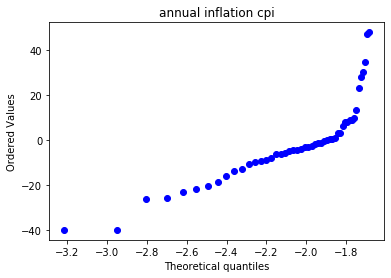

In [53]:
# p value is less than 0.05 we therefore reject the null hypothesis of normality meaning the data are not normally distributed
diff = (crisis['inflation_annual_cpi']) - (no_crisis['inflation_annual_cpi'])
# it is good to compare with visual method of checking normaplity using p-p plot and histogram
stats.probplot(diff, plot = plt)
plt.title("annual inflation cpi")

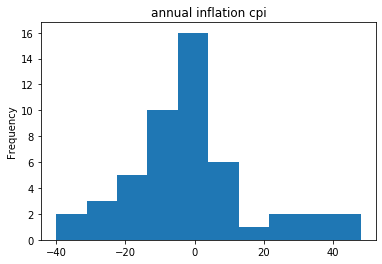

In [54]:
#p-p plot shows a deviation from normality
diff.plot(kind = 'hist', title = "annual inflation cpi")

In [57]:
#carrying out Welch's test
stats.ttest_ind(crisis['inflation_annual_cpi'], no_crisis['inflation_annual_cpi'], equal_var = False)

Ttest_indResult(statistic=1.0034917316208858, pvalue=0.3158531129498388)

In [63]:
# our p value is not significant(i.e p> 0.05), therefore, we accept null hypothesis. It can be concluded that there is no
# significance difference in purchasing power when there is banking crisis and when there is no banking crisis
#lets try to get the dof
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(crisis['inflation_annual_cpi'], no_crisis['inflation_annual_cpi'])



 Welch's t-test= 1.0035 
 p-value = 0.3159 
 Welch-Satterthwaite Degrees of Freedom= 1058.0000


In [67]:
# lets try thesame test using independent t test
results, descriptives = rp.ttest(crisis['inflation_annual_cpi'], no_crisis['inflation_annual_cpi'])
results


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,inflation_annual_cpi,1059.0,20848.892444,675727.429176,20764.599936,-19895.586838,61593.371726
1,inflation_annual_cpi,49.0,11.788035,11.209163,1.601309,8.568388,15.007683
2,combined,1108.0,19927.395949,660616.948472,19846.312769,-19013.238166,58868.030065


In [66]:
descriptives

,Independent t-test,results
0,Difference (inflation_annual_cpi - inflation_a...,20837.1044
1,Degrees of freedom =,1106.0000
2,t =,0.2158
3,Two side test p value =,0.8292
4,Difference > 0 p value =,0.5854
5,Difference < 0 p value =,0.4146
6,Cohen's d =,0.0315
7,Hedge's g =,0.0315
8,Glass's delta =,0.0308
9,r =,0.0065


In [ ]:
# there's a great difference in the p value using compoaring between the two tests i.e student t test and Welch's test